In [5]:
import requests
import pandas as pd
import json


payload = {}
headers= {}

In [2]:
def url(what, name, other):
    api_key = 'k_lcsb8452'
    return 'https://imdb-api.com/en/API/' + what + '/' + api_key + '/' + str(name) + other

In [3]:
def one(name):
    resp = requests.get(url('SearchTitle', name, ''), headers=headers)
    data = json.loads(resp.text)
    id_film = data['results'][0]['id']
    
    resp3 = requests.get(url('Title', id_film, ''), headers=headers)
    data3 = json.loads(resp3.text)
    seasons = len(data3['tvSeriesInfo']['seasons'])

    episodes_all = 1
    for season in range(1, seasons + 1):
        resp2 = requests.get(url('SeasonEpisodes', id_film, '/' + str(season)), headers=headers)
        id_season = json.loads(resp2.text)
        for episodes in range(len(id_season['episodes'])):
            episodeNumber = id_season['episodes'][episodes]['episodeNumber']
            imDbRating = id_season['episodes'][episodes]['imDbRating']
            with open('attack.txt', 'a') as file:
                file.write(str(name) + ',' + str(season) + ',' + 
                           str(episodeNumber) + ',' + str(imDbRating) + ',' + str(episodes_all)
                           + '\n')
            episodes_all += 1

In [11]:
one('Death Note')

    season  episode  rating
0        1        1     9.1
1        1        2     8.5
2        1        3     8.1
3        1        4     8.6
4        1        5     9.2
..     ...      ...     ...
82       4       24     8.5
83       4       25     8.7
84       4       26     9.2
85       4       27     9.6
86       4       28     9.7

[87 rows x 3 columns]


<AxesSubplot:>

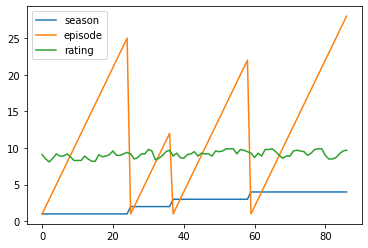

In [117]:
import pandas as pd
datas = pd.read_csv('attack.txt', sep=',')
print(datas)
# datas.plot()